In [80]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

x = 15
y = x
plt.rcParams["figure.figsize"]= x, y


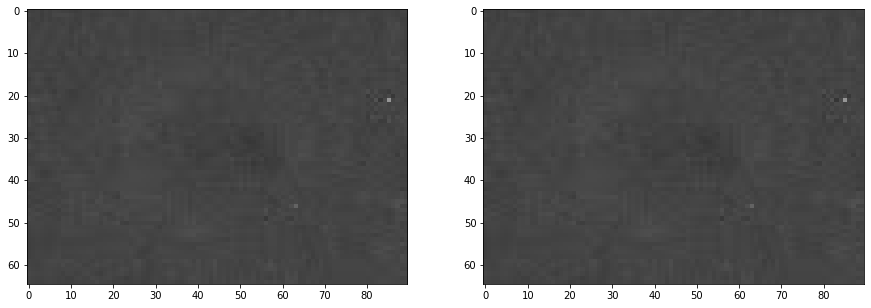

In [81]:
# path = 'source\\022622_bubbleformation_80x_075M_3_original.avi'
# path = 'source\\bubbleanalysis_90x_066_2s_6_original.avi'
path = 'source\\011222_pdda_30x66M_large_3.avi'
cap = cv2.VideoCapture(path)

idx1 = 700
idx2 = 700

cap.set(cv2.CAP_PROP_POS_FRAMES, idx1)
ret, frame1 = cap.read()

cap.set(cv2.CAP_PROP_POS_FRAMES, idx2)
ret, frame2 = cap.read()

# select template region
(x, y, w, h) = cv2.selectROI(frame1)
cv2.destroyAllWindows()

template = frame1[y:y+h, x:x+w]
# plt.imshow(frame1)

plt.subplot(1, 2, 1)
plt.imshow(frame1[y:y+h, x:x+w])
plt.subplot(1, 2, 2)
plt.imshow(frame2[y:y+h, x:x+w])


Displacement of video 'source\011222_pdda_30x66M_large_3.avi' from frame 700 to frame 700 is 0 pixels in x direction (0.0 um) and 0 pixels in y direction (0.0 um)


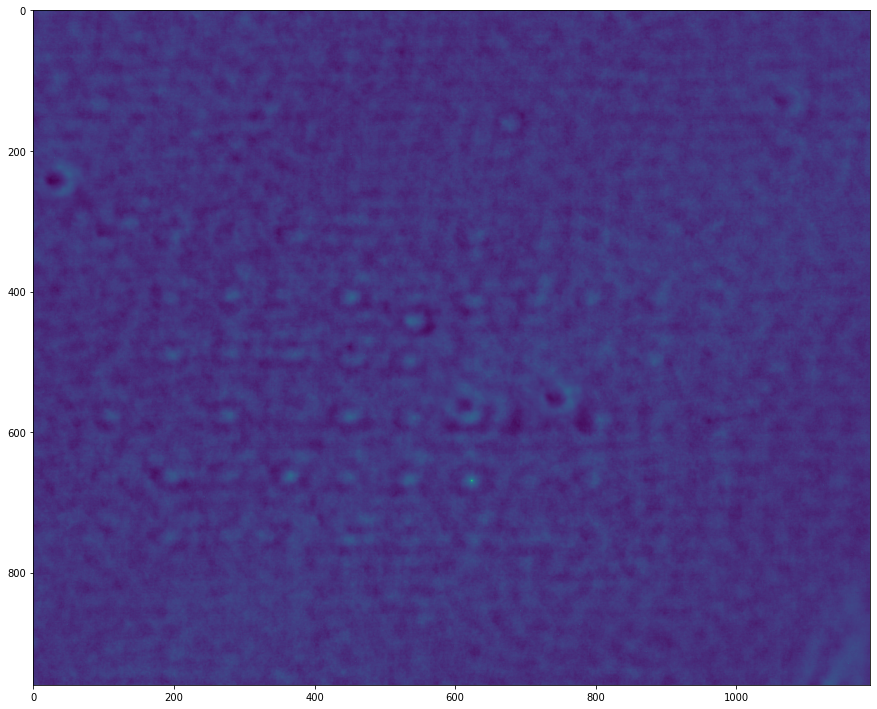

In [82]:

# match on original to get position
orig_res = cv2.matchTemplate(frame1,template,cv2.TM_CCOEFF_NORMED)
# match on comparison to get displacement
match_res = cv2.matchTemplate(frame2,template,cv2.TM_CCOEFF_NORMED)

plt.imshow(match_res)

# [3] to get max location
pos1 = cv2.minMaxLoc(orig_res)[3]
pos2 = cv2.minMaxLoc(match_res)[3]

shift = np.subtract(pos1, pos2)

px_to_um = 600 / 1280

print(f'Displacement of video \'{path}\' from frame {idx1} to frame {idx2} is {shift[0]} pixels in x direction ({shift[0]*px_to_um} um) and {shift[1]} pixels in y direction ({shift[1]*px_to_um} um)')


In [83]:
img = np.interp(match_res, (match_res.min(), match_res.max()), (0, 255))
img = np.array(img, dtype=np.uint16)

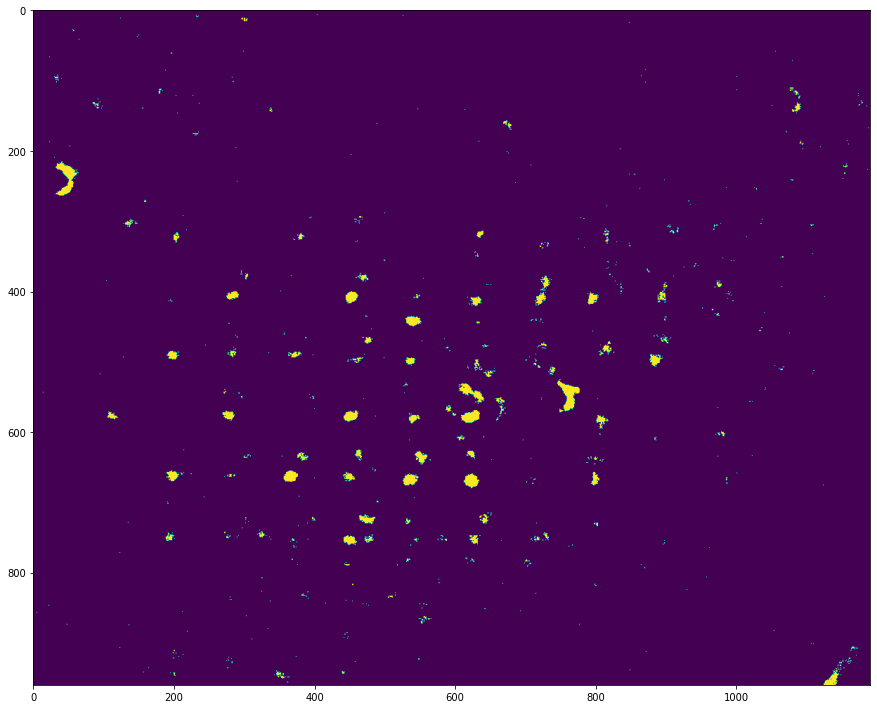

In [86]:
_, thresh = cv2.threshold(img, 56, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)